# Sect 06:  Visualizations

- onl01-dtsc-pt-041320
- 05/06/20


## Questions/Comments?

- Seaborn is pretty awesome!

- What's the best/normal you would make/start a plot?

- Can we look at the last line of code of the Seaborn Lab?
```python
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips)
```

## Learning Objectives

- Learn about the anatomy of a Matplotlib figure. 

- Learn about how other packages use Matplotlib
 
- Discuss and demonstrate the 2 different syntaxes/interfaces of Matplotlib

- Activity: Remaining portion of Section 05's Data Cleaning Project with Superheroes

___

# Intro to Matplotlib

- Matplotlib is the backbone of plotting in python and used by pandas,seaborn,etc.
    - [Matplotlib Example Gallery](https://matplotlib.org/gallery/index.html#examples-index) 
    - [Seaborn Example Gallery](https://seaborn.pydata.org/examples/index.html)
    - ['Pandas Visualization docs']('https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html')



-  *Matplotlib is powerful but can be a bit confusing at times because of its 2 sets of commands:*
    - the matplotlib.pyplot functions (`plt.bar()`,`plt.title()`)
    - the object_oriented methods (`ax.bar()`,`ax.set_title()`)
    
    
    
- The 2 syntaxes can be confusing at first and cause problems & odd results when mixed together.
    - Learn about some of the problems when mixing types.
    - Example: see how plt.title()/plt.xlabel(),etc. can behave strangely in subplots.
 

### References

#### Blog Posts

- **Bookmark this article, its the best explanation of how matploblib'S 2 interfaces work:**
> ["Artist" in Matplotlib - something I wanted to know before spending tremendous hours on googling how-tos.](https://dev.to/skotaro/artist-in-matplotlib---something-i-wanted-to-know-before-spending-tremendous-hours-on-googling-how-tos--31oo)<br>

- [My Blog Post on Making Customized Figures in seaborn](https://jirvingphd.github.io/harnessing_seaborn_subplots_for_eda)
    - This covers some concepts we didn't have time to cover, like ticklabel formatters.
    
#### **Matplotlib Offical Documentation**

- [Markers](https://matplotlib.org/3.1.1/api/markers_api.html)
- [Colors](https://matplotlib.org/3.1.0/gallery/color/named_colors.html )
- [Text](https://matplotlib.org/3.1.0/tutorials/text/text_intro.html )
- [Text Properties](https://matplotlib.org/3.1.1/tutorials/text/text_props.html)

## Matplotlib Anatomy / Structure


- Matplotlib Figures are composed of 3 different objects:
    - `Figure` is the largest bucket and contains everything else. It is like a picture frame without any actual images in it.
  - `Axes` are the actual plot / image inside of the Figure / frame. 
        - this is the same `ax` as in `fig, ax = plt.subplots()` and that is returned when you create a Pandas or Seaborn figure.
        - There is an 'Axes` for each subplot in the Figure
        - `Axes` contain information about the titles, labels, grid,background, they also contain an. See the figure below for the contents of `Axes`

<center><img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/matplotlib_anatomy.png" width=400></center>


        
- Inside Axes there is an `Axis` which is further divided into an `Axis.xaxis` and an `Axis.yaxis` that contain the ticks and the tick lables.
    <center><img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/matplotlib_Axes_layout2.png" width=500></center>
  

# Previously on...  *Section 05*

In [3]:
# !pip install -U fsds
from fsds.imports import *

## Prior Activity: Project - Data Cleaning

- [Lesson](https://learn.co/tracks/module-1-data-science-career-2-1/intro-to-data-with-python-and-sql/section-05-data-cleaning-in-pandas/project-data-cleaning)

- [Solution](https://github.com/learn-co-students/dsc-data-cleaning-project-onl01-dtsc-pt-041320/tree/solution)

In [4]:
!pip install -U fsds
from fsds.imports import *

Requirement already up-to-date: fsds in /anaconda3/envs/learn-env/lib/python3.6/site-packages (0.2.8)


In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
heroes_df = fs.datasets.load_superhero_info(read_csv_kwds={'index_col':0})#pd.read_csv('heroes_information.csv',index_col=0)
powers_df = fs.datasets.load_superhero_powers()#pd.read_csv('super_hero_powers.csv')
display(heroes_df.head(),powers_df.head())

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
heroes_df.drop_duplicates(inplace=True)
heroes_df[heroes_df.duplicated()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight


In [8]:
heroes_df.drop_duplicates(subset=['name'],inplace=True)
heroes_df[heroes_df.duplicated(subset=['name'],keep=False)]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight


In [9]:
# heroes_df.loc[(heroes_df['Weight']<0)]#,(heroes_df['Weight']<0)]

In [10]:
str_cols = list(heroes_df.select_dtypes('object').columns)
str_cols

['name',
 'Gender',
 'Eye color',
 'Race',
 'Hair color',
 'Publisher',
 'Skin color',
 'Alignment']

In [11]:
# for col in str_cols:
#     display(heroes_df[col].value_counts(dropna=False))
#     print()

In [12]:
placeholders = ['-',-99.0]
heroes_df.replace(placeholders,np.nan, inplace=True)#.isna().sum()

num_cols = heroes_df.select_dtypes('number').columns
for col in num_cols:
    heroes_df[col] = heroes_df[col].fillna(heroes_df[col].median())
    

heroes_df.isna().sum()/len(heroes_df)*100

name           0.000000
Gender         3.916084
Eye color     23.076923
Race          41.958042
Hair color    23.216783
Height         0.000000
Publisher      2.097902
Skin color    90.069930
Alignment      0.979021
Weight         0.000000
dtype: float64

In [13]:
heroes_df.dropna(subset=['Alignment','Publisher'],inplace=True)
heroes_df.isna().sum()

name            0
Gender         25
Eye color     154
Race          293
Hair color    155
Height          0
Publisher       0
Skin color    625
Alignment       0
Weight          0
dtype: int64

In [14]:
res = heroes_df.isna().sum()#.apply()
res[res>0]#.index

Gender         25
Eye color     154
Race          293
Hair color    155
Skin color    625
dtype: int64

In [15]:
null_cols = res[res>0].index

null_cols

Index(['Gender', 'Eye color', 'Race', 'Hair color', 'Skin color'], dtype='object')

In [16]:
idx = heroes_df['Gender'].isna()
# heroes_df.loc[idx,'Gender'] = "missing"
heroes_df['Gender'].value_counts()

Male      475
Female    194
Name: Gender, dtype: int64

In [17]:
for col in null_cols:
    val_counts = heroes_df[col].value_counts(normalize=True)
    idx = heroes_df[col].isna()
    heroes_df.loc[idx,col] = heroes_df.loc[idx,col].apply(lambda x: np.random.choice(val_counts.index,
                                                           p=val_counts.values))

In [18]:
# heroes_df['Race'].value_counts(normalize=True)

In [19]:
heroes_df.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

### Joining, Grouping, and Aggregating


In [20]:
# display(heroes_df.head(),powers_df.head())

In [21]:
pd.set_option('display.max_columns',0)

df = pd.merge(heroes_df, powers_df, left_on='name', right_on='hero_names')
df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,orange / white,good,441.0,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,Abe Sapien,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

> In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [22]:
male_heroes_df = df.groupby('Gender').get_group('Male')
female_heroes_df = df.groupby('Gender').get_group('Female')

display(male_heroes_df.head(),female_heroes_df.head())

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,orange / white,good,441.0,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,Abe Sapien,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
21,Angel Dust,Female,yellow,Mutant,Black,165.0,Marvel Comics,green,good,57.0,Angel Dust,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
22,Angel Salvadore,Female,brown,Mutant,Black,163.0,Marvel Comics,purple,good,54.0,Angel Salvadore,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [23]:
## Solution Function
def show_distplot(dataframe, gender, column_name):
    plt.plot()
    dataframe[column_name].hist()
    plt.title('Distribution of {} for {} heroes'.format(column_name, gender))
    plt.xlabel(column_name)
    plt.ylabel('Probability Density')
    plt.show()
    

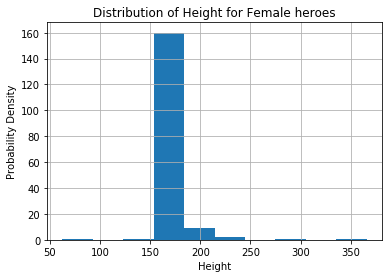

In [24]:
show_distplot(female_heroes_df,'Female','Height')

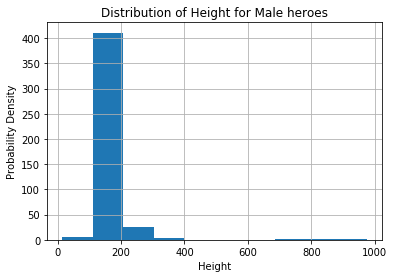

In [25]:
# Male Height
show_distplot(male_heroes_df,'Male','Height')

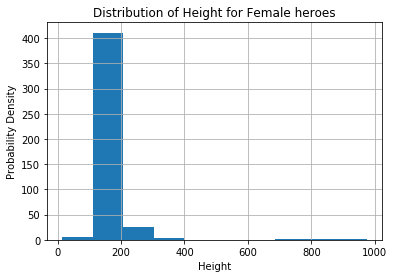

In [26]:
# Female Height
show_distplot(male_heroes_df,'Female','Height')

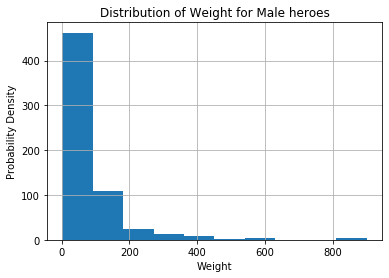

In [27]:
# Male Weight
show_distplot(df,'Male','Weight')

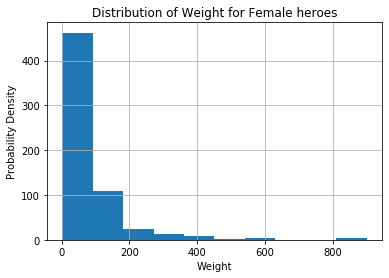

In [28]:
show_distplot(df,'Female','Weight')

In [29]:
import seaborn as sns
## our version
def plot_heroes(df, group_col, group_to_plot, plot_col):
    
    group_df = df.groupby(group_col).get_group(group_to_plot)
  
    fig,ax = plt.subplots()
    
    sns.distplot(group_df[plot_col],kde=False,ax=ax)
    
    ax.set_title(f"Grouped by {group_col}: {group_to_plot}")
    return fig,ax

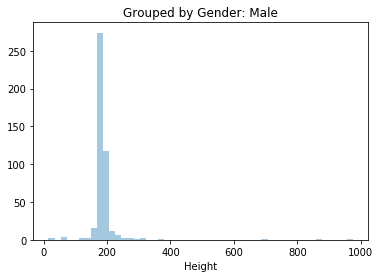

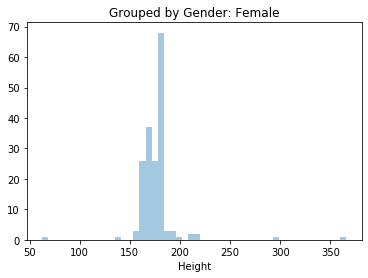

In [30]:
fig,ax = plot_heroes(df, 'Gender','Male','Height')
fig,ax = plot_heroes(df, 'Gender','Female','Height')

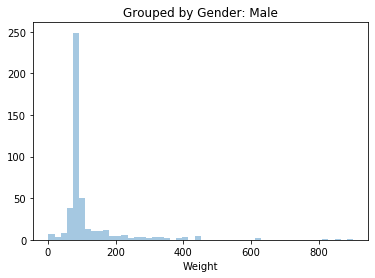

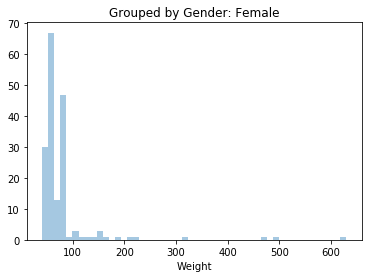

In [31]:
fig,ax = plot_heroes(df, 'Gender','Male','Weight')
fig,ax = plot_heroes(df, 'Gender','Female','Weight')

> Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



___

# ACTIVITY: Visualizing Super Heroes

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [32]:
df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,orange / white,good,441.0,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,Abe Sapien,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [34]:
## Get list of power columns
power_cols = powers_df.drop('hero_names',axis=1).columns
power_cols

Index(['Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight', 'Danger Sense',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=167)

In [38]:
## Get counts for how many heroes have each power
power_counts = df[power_cols].sum()
power_counts

Agility                  226
Accelerated Healing      171
Lantern Power Ring        11
Dimensional Awareness     22
Cold Resistance           47
                        ... 
Phoenix Force              1
Molecular Dissipation      1
Vision - Cryo              1
Omnipresent                1
Omniscient                 1
Length: 167, dtype: int64

In [40]:
## Save the top 10 most common powers
top_10 = power_counts.sort_values(ascending=False).head(10)
top_10

Super Strength         341
Stamina                271
Durability             242
Super Speed            236
Agility                226
Flight                 203
Accelerated Healing    171
Reflexes               156
Intelligence           148
Energy Blasts          141
dtype: int64

# Matplotlib.pyplot 

- https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html
- Pyplot figures don't need to be created first. You can just call one of the plotting functions `plt.bar/plot/scatter/etc`
- Any `plt` commands entered in the same cell will happen on the same plot.

```python
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.hist(x)
plt.scatter(x,y)
plt.bar(x, height) #x= group/label, height = bar height/ y

```

- BUT if you want to specify figsize, you have to you create the figure first with `plt.figure(figsize=(W,H))` where width and height are numbers.

```python
fig = plt.figure(figsize=(10,5))
plt.plot(x,y)
```

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

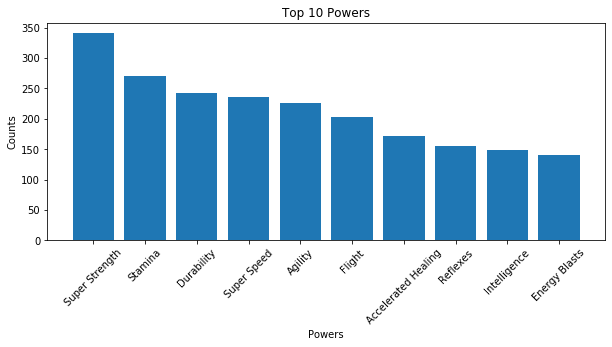

In [48]:
## Use plt functions to plot top 10 and add axis labels,title
plt.figure(figsize=(10,4))
plt.bar(top_10.index,top_10.values)
plt.title("Top 10 Powers")
plt.xlabel("Powers")
plt.ylabel("Counts")
# Fix the xticklabels
plt.xticks(rotation=45)
# plt.tick_params(axis='x',labelrotation=45)

<BarContainer object of 10 artists>

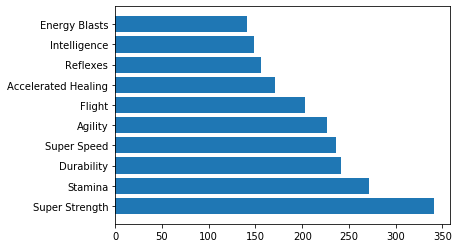

In [49]:
plt.barh(top_10.index,top_10.values)


## Matplotlib's Object-Oriented Interface
- Create new figures by using `fig,ax=plt.subplots()` to create a figure _first_
    - If do not specify `nrows` or `ncols` it produces one ax inside the figure.
    
    - If you create subplots by passing it more rows or columns, then ax becomes a *list* of the axes.
    `fig, axes = plt.subplots(ncols=2)`
    
- Plotting commands are then called directly by the `ax` as a method.
i.e. `ax.plot()`

- Adding text and styling is done via a different set of commands, which are also called directly by the `ax`, and start with `.set_`
- The command for setting the title changes from `plt.title` to `ax.set_title()`
- `ax.set_ylabel()`
- etc.

[Text(0, 0.5, 'Counts'),
 Text(0.5, 0, 'Powers'),
 Text(0.5, 1.0, 'Top 10 Powers')]

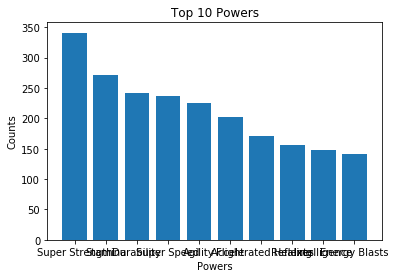

In [56]:
## Create fig,ax FIRST then use ax to plot top_10
fig, ax = plt.subplots()
ax.bar(top_10.index, top_10.values)
# ax.set_ylabel('Counts')
# ax.set_xlabel('Powers')
# ax.set_title('Top 10 Powers')
ax.set(ylabel='Counts', xlabel= 'Powers', title='Top 10 Powers')

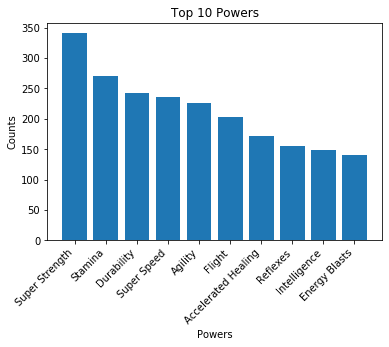

In [60]:
## Fix the xticklabels
ax.set_xticklabels(ax.get_xticklabels(),fontdict={'rotation':45,'ha':'right'})
fig

## Pandas & Seaborn

- *Matplotlib is the backbone of plotting in python.*<br> 
- Many packages ( `statsmodels`,`seaborn`,`pandas`,`plotly`) use a matplotlib backbone to make complex and aesthetically pleasing visuals.<br>
    - i.e. pandas `df.plot()/df.scatter()` are using matplotlib's .plot(), .scatter(), but wrapped 
    - i.e. seaborn's sns.regplot() is a matplotlib plt.scatter() and a plt.plot() line
    
- Both pandas and seaborn take an `ax=` argument in their plots.

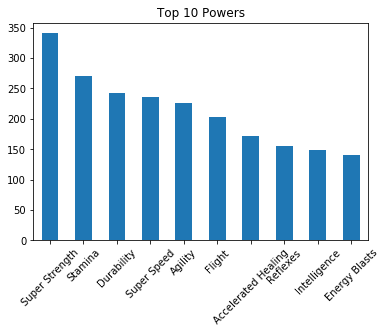

In [65]:
## Plot top_10 with Pandas
top_10.plot(kind='bar',rot=45, title="Top 10 Powers")#,ylabel='Counts',xlabel='Powers')

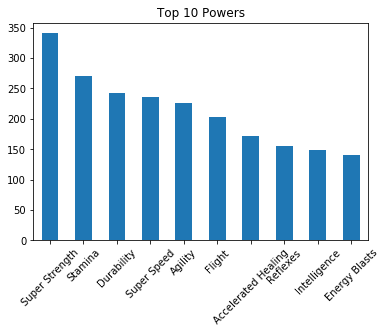

In [68]:
## Plot top_10 with Pandas, then update labels, title, xticklabels
ax = top_10.plot(kind='bar',rot=45, title="Top 10 Powers")

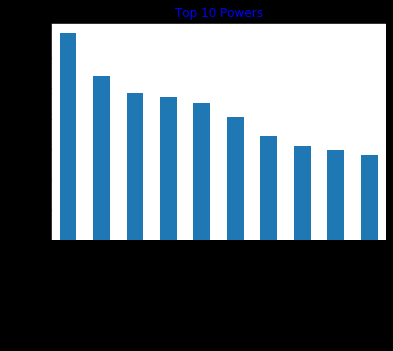

In [82]:
ax.set_xticklabels(ax.get_xticklabels(),fontdict={'rotation':45,'ha':'right'})
ax.set(ylabel='Counts', xlabel= 'Powers', title='Top 10 Powers')
fig = ax.get_figure()
fig

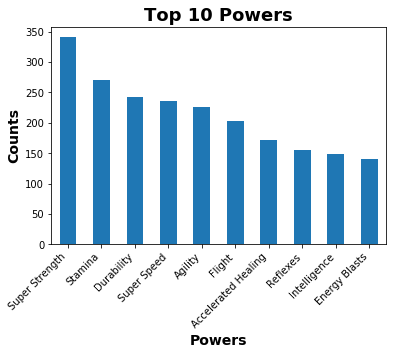

In [89]:
axlabels = dict(fontsize=14,fontweight='semibold')
ax.set_ylabel('Counts',fontdict=axlabels)
ax.set_xlabel('Powers',fontdict=axlabels)
# ax.set(xlabel='Powers',ylabel="couts",fontdict=axlabels)
ax.set_title('Top 10 Powers', fontdict=dict(fontsize=18, weight='bold',color='black'))
fig.set_facecolor('white')
fig

In [86]:
# plt.rcParams

- We can customize the text properties for our labels using the `fontdict` parameter in our text/labeling functiopns 

    - font_dict is a dictionary with a keyword that specifies what property to change and a value for that property
    - [See this link for available properties](https://matplotlib.org/3.1.1/tutorials/text/text_props.html?highlight=text)

In [95]:
def plot_top_n(value_counts, title="Top 10 Powers"):
    
    ## Make our bar plot
    ax = value_counts.plot(kind='bar',rot=45)
    fig = ax.get_figure()
    
    ## Set the xticklabels to rrotate
    ax.set_xticklabels(ax.get_xticklabels(),fontdict={'rotation':45,'ha':'right'})
    
    # Set title/ax labels
    axlabels = dict(fontsize=14,fontweight='semibold')
    ax.set_ylabel('Counts',fontdict=axlabels)
    ax.set_xlabel('Powers',fontdict=axlabels)
    
    # Setr title
    ax.set_title(title, fontdict=dict(fontsize=18, weight='bold',color='black'))
    
    return fig,ax

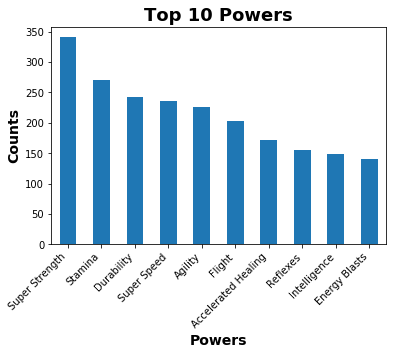

In [98]:
## Use new function on power_counts
fig,ax = plot_top_n(top_10)#,title='See!')

### Q2: Powers by Publisher

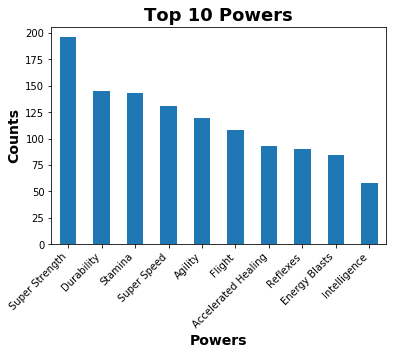

In [105]:
## Get marvel hero power counts
marvel_counts = df.groupby('Publisher').get_group('Marvel Comics')[power_cols].sum()
marvel_counts = marvel_counts.sort_values(ascending=False).head(10)
marvel_counts.name = 'Marvel'
marvel_counts


In [124]:
## Get DC hero power counts
dc_counts = df.groupby('Publisher').get_group('DC Comics')[power_cols].sum()
dc_counts = dc_counts.sort_values(ascending=False).head(10)
dc_counts.name = 'DC'
dc_counts

Super Strength         103
Stamina                 83
Flight                  82
Super Speed             75
Agility                 68
Durability              67
Intelligence            62
Accelerated Healing     50
Stealth                 43
Invulnerability         43
Name: DC, dtype: int64

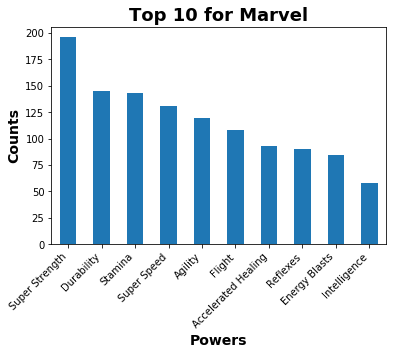

In [108]:
## Plot them
fig,ax = plot_top_n(marvel_counts,title=f"Top 10 for {marvel_counts.name}")

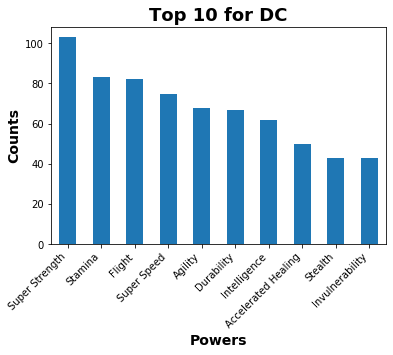

In [109]:
## PLot them
fig,ax = plot_top_n(dc_counts,title=f"Top 10 for {dc_counts.name}")

> Analyze the results you found above to answer the following question:

> How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

> Write your answer below this line:
____________________________________________________________________________________________________________________________

## Matplotlib Styles

You can specify a style sheet for pandas, which will change the default visual style for all plots. 
- **[Visit the gallery for a preview of the styles available.](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html)**


```python
import matplotlib.pyplot as plt
plt.style.use('style-name')
```

Use a context` block to apply a style to that figure only:
```python
with plt.style.context('style-name'):
    plt.plot()
```

In [112]:
style_names = plt.style.available

print("[i] Available matplotlib styles:")
[print('\t',x) for x in style_names];

[i] Available matplotlib styles:
	 _classic_test_patch
	 seaborn-dark
	 seaborn-darkgrid
	 seaborn-ticks
	 fivethirtyeight
	 seaborn-whitegrid
	 classic
	 _classic_test
	 fast
	 seaborn-talk
	 seaborn-dark-palette
	 seaborn-bright
	 seaborn-pastel
	 grayscale
	 seaborn-notebook
	 ggplot
	 seaborn-colorblind
	 seaborn-muted
	 seaborn
	 Solarize_Light2
	 seaborn-paper
	 bmh
	 tableau-colorblind10
	 seaborn-white
	 dark_background
	 seaborn-poster
	 seaborn-deep


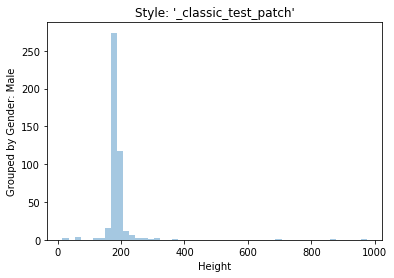

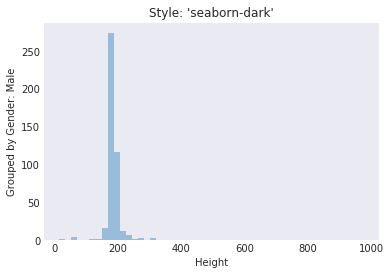

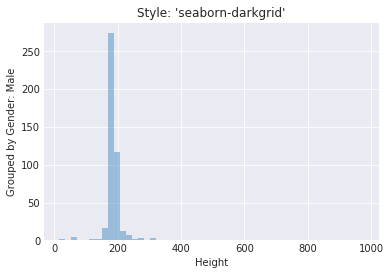

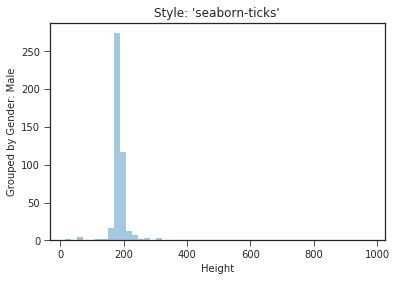

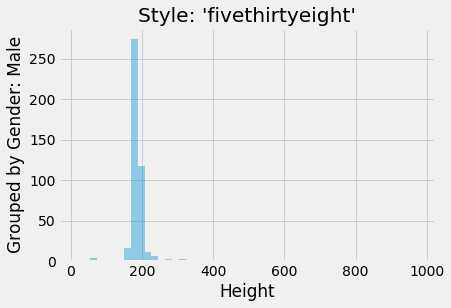

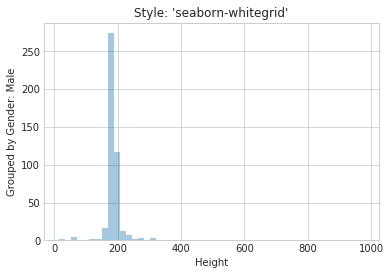

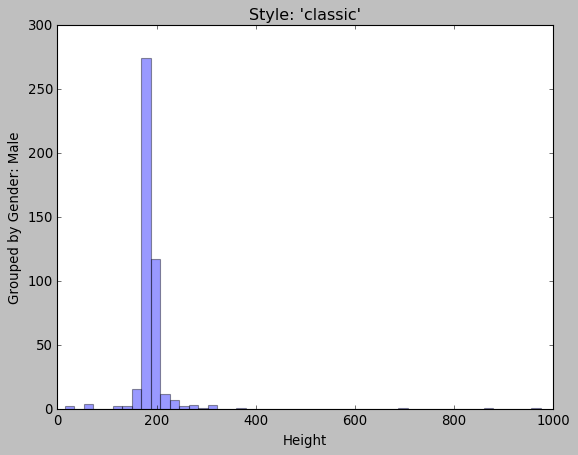

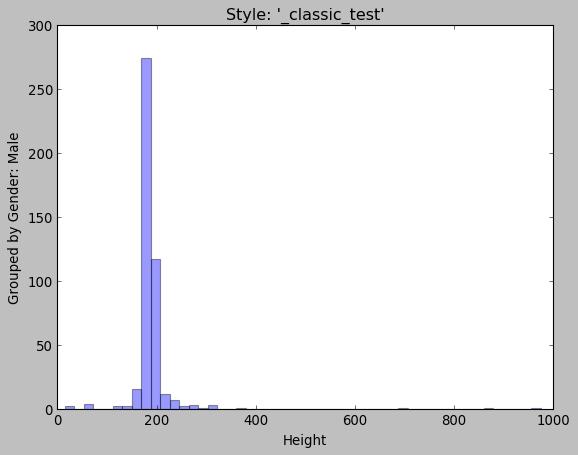

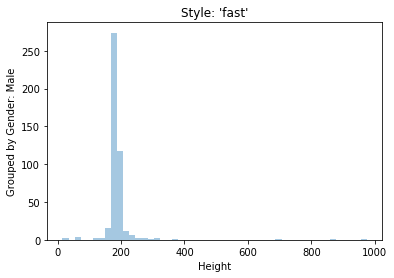

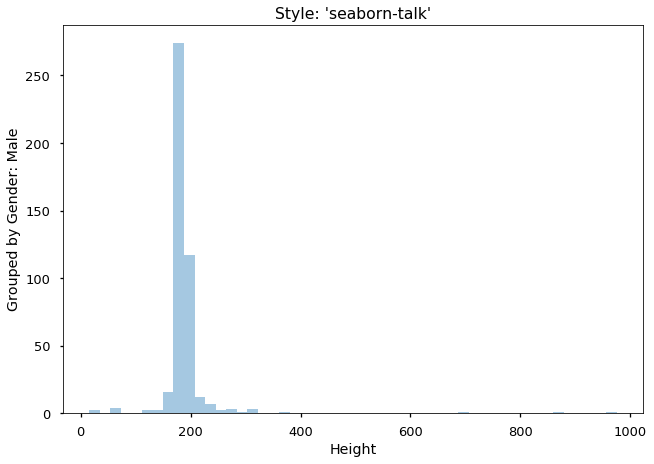

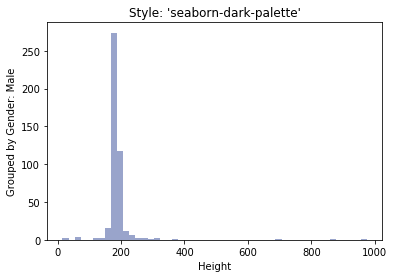

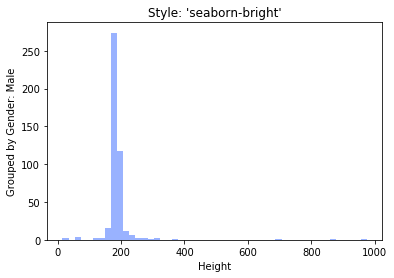

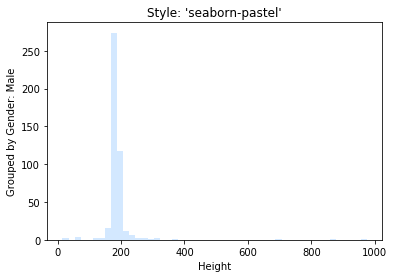

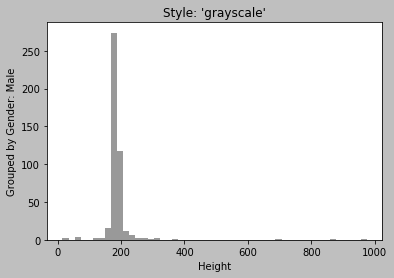

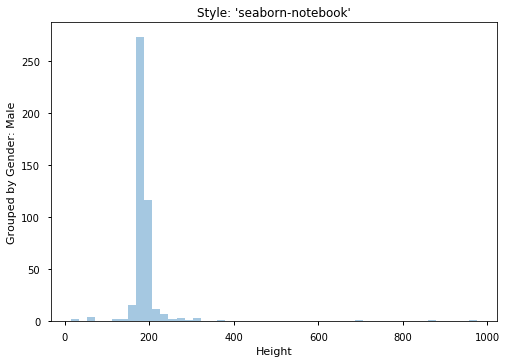

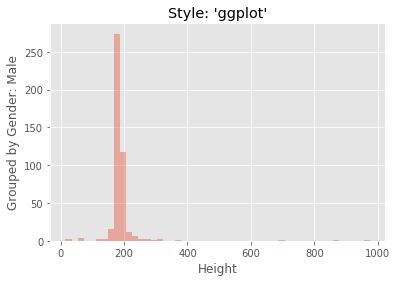

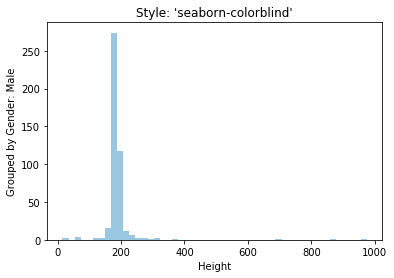

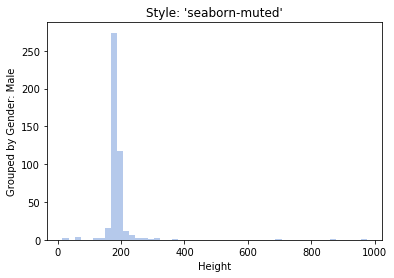

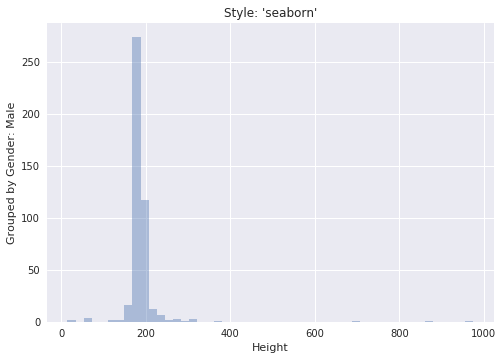

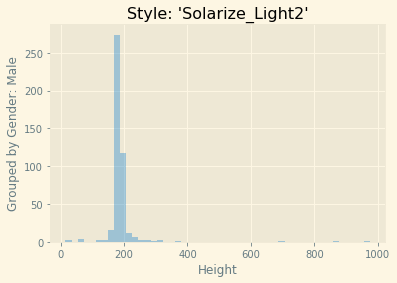

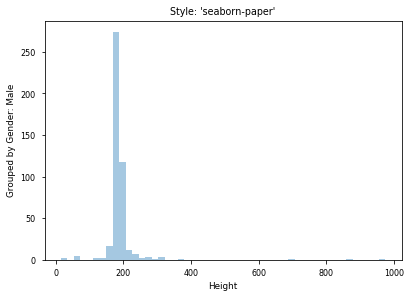

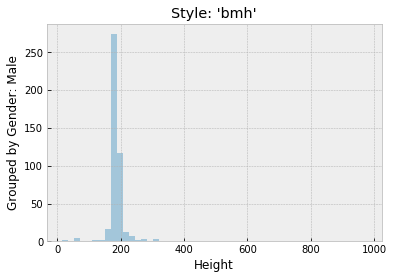

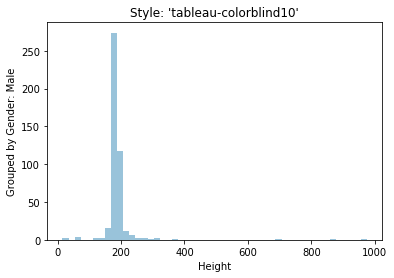

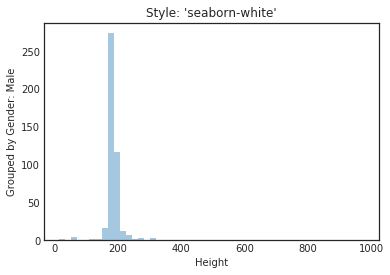

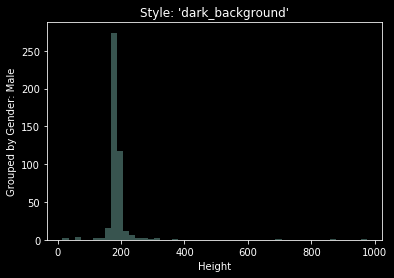

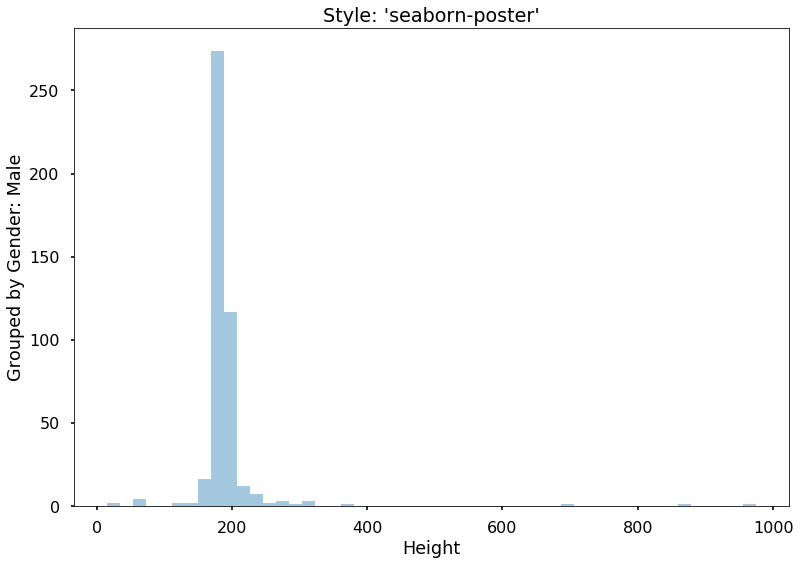

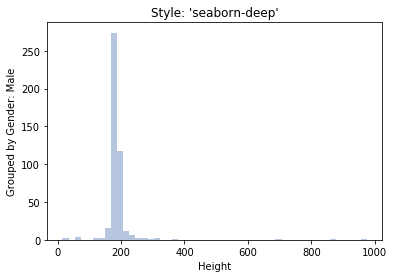

In [113]:
# Loop through style names
for style in style_names:
    
    # Use context manager to apply style to ONLY this figure
    with plt.style.context(style):
        fig,ax = plot_heroes(df,'Gender','Male','Height')
        ax.set_ylabel(ax.get_title())
        ax.set_title(f"Style: '{style}'")
        

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2b7fdc88>)

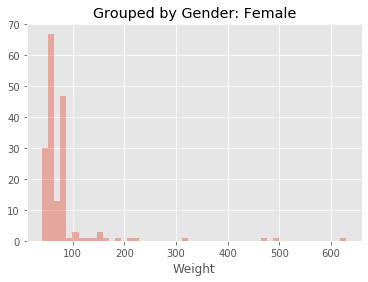

In [114]:
# Female Weight
plt.style.use('ggplot')
plot_heroes(df,'Gender','Female','Weight')

# If time permits: subplots

In [115]:
def plot_top_n_ax(value_counts, title="Top 10 Powers",ax=None):
    
    ## Make our bar plot
    ax = value_counts.plot(kind='bar',rot=45,ax=ax)
    fig = ax.get_figure()
    
    ## Set the xticklabels to rrotate
    ax.set_xticklabels(ax.get_xticklabels(),fontdict={'rotation':45,'ha':'right'})
    
    # Set title/ax labels
    axlabels = dict(fontsize=14,fontweight='semibold')
    ax.set_ylabel('Counts',fontdict=axlabels)
    ax.set_xlabel('Powers',fontdict=axlabels)
    
    # Setr title
    ax.set_title(title, fontdict=dict(fontsize=18, weight='bold',color='black'))
    
    return fig,ax

(<Figure size 720x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2e67da20>)

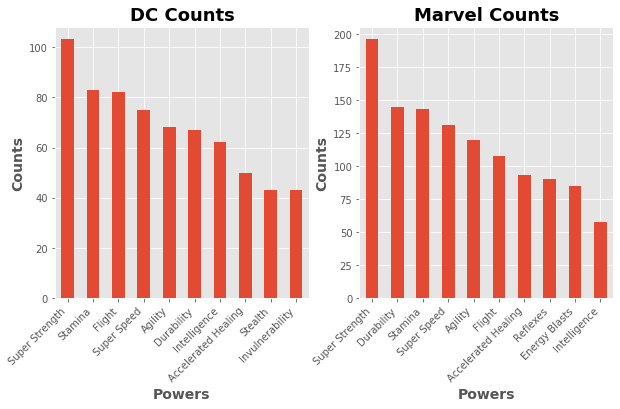

In [122]:
fig, ax = plt.subplots(ncols=2,figsize=(10,5))
plot_top_n_ax(dc_counts,title='DC Counts',ax=ax[0])
plot_top_n_ax(marvel_counts,title='Marvel Counts',ax=ax[1])

In [127]:
plot_df = pd.concat([marvel_counts.reset_index(),dc_counts.reset_index()],axis=1)
plot_df#.reset_index(inplace=True)
plot_df

,index,Marvel,index,DC
0,Super Strength,196,Super Strength,103
1,Durability,145,Stamina,83
2,Stamina,143,Flight,82
3,Super Speed,131,Super Speed,75
4,Agility,120,Agility,68
5,Flight,108,Durability,67
6,Accelerated Healing,93,Intelligence,62
7,Reflexes,90,Accelerated Healing,50
8,Energy Blasts,85,Stealth,43
9,Intelligence,58,Invulnerability,43


In [ ]:
sns.barplot()

In [136]:
[x+.5 for x in xs]

[1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]

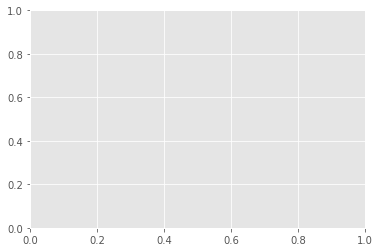

In [150]:
fig,ax=plt.subplots()

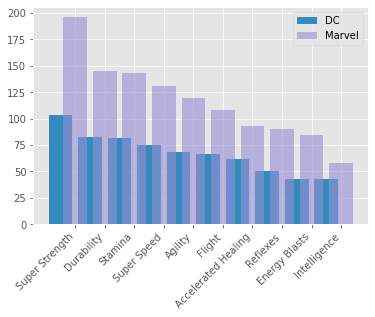

In [142]:
fig,ax=plt.subplots()
xs= list(range(1,len(dc_counts)+1))
xs2 = [x+.5 for x in xs]
ax.bar(xs, dc_counts.values,tick_label=dc_counts.index)
ax.set_xticklabels(ax.get_xticklabels(),fontdict={'rotation':45,'ha':'right'})

ax.bar(xs, dc_counts.values,tick_label=dc_counts.index,label='DC')
ax.set_xticklabels(ax.get_xticklabels(),fontdict={'rotation':45,'ha':'right'})

ax.bar(xs2, marvel_counts.values,tick_label=marvel_counts.index,alpha=0.6,label='Marvel')
ax.legend()

fig;

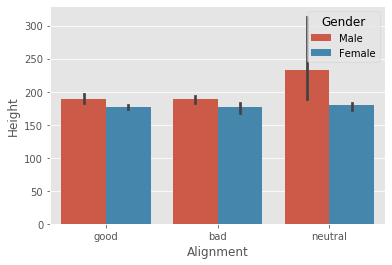

In [149]:
ax = sns.barplot(x='Alignment',y='Height',data=df, hue='Gender')
# ax.get_figure();

In [159]:
# # plt.subplots(gridspec_kw=)
# fig = plt.gcf()
# ax = plt.gca()

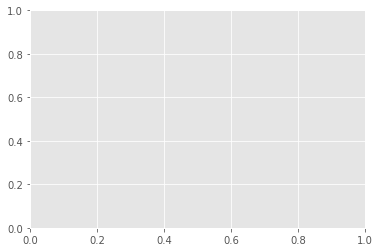

In [158]:
fig

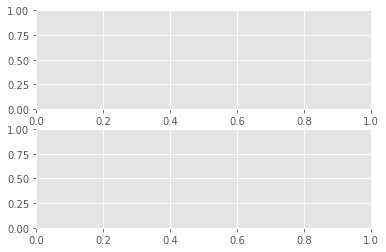

In [154]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


## Question from Subplots & Enumeration Lab

- How does the row/col code work?

(4, 2)


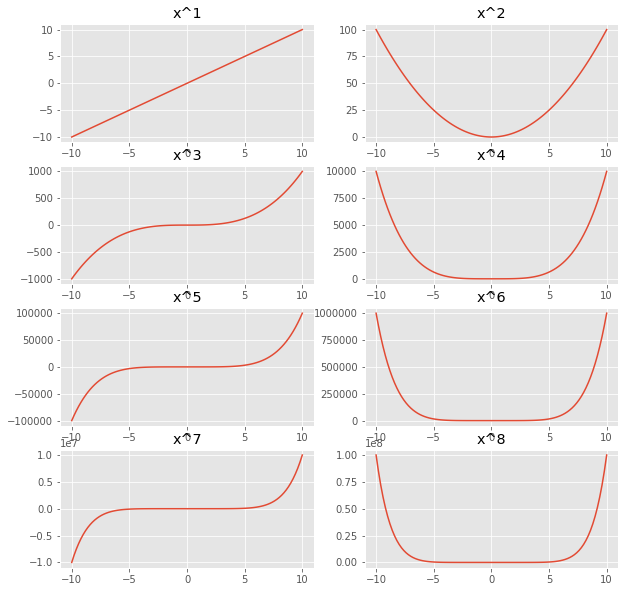

In [169]:
x = np.linspace(-10, 10, 101)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,10))
print(axes.shape)
plt.title('Graphs of Various Polynomials')

for n in range(1,9):
    row = (n-1)//2
    col = n%2-1
    ax = axes[row][col]
    y = [xi**n for xi in x]
    ax.plot(x,y)
    ax.set_title('x^{}'.format(n))

(8,)


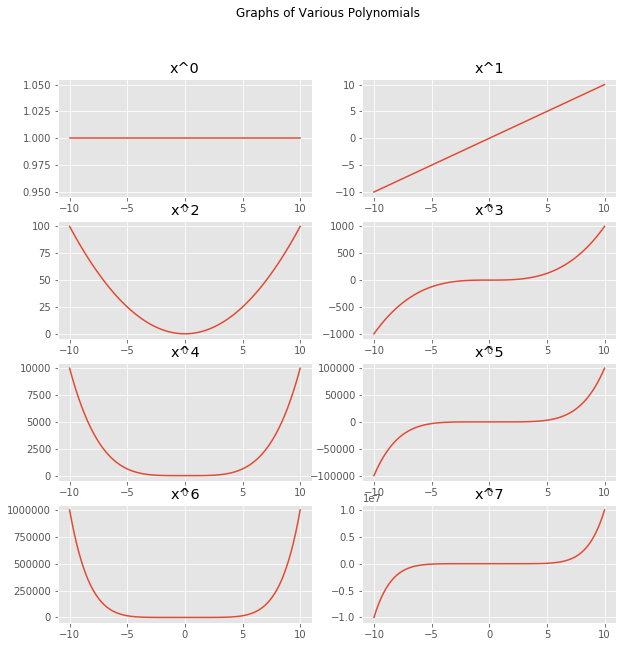

In [171]:
x = np.linspace(-10, 10, 101)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,10))

## We can flatten the list of axes to simplify our loop
axes = axes.flatten()
print(axes.shape)


plt.suptitle('Graphs of Various Polynomials')
for n,ax in enumerate(axes):
    y = [xi**n for xi in x]
    ax.plot(x,y)
    ax.set_title('x^{}'.format(n))
    

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data